<a href="https://colab.research.google.com/github/sitthatkaja/multivariate/blob/main/EXAM01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
## **Exam01**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
from scipy import stats

In [5]:
from sklearn.decomposition import PCA

***

In [6]:
exam = pd.read_csv('Pizza.csv')

In [7]:
exam

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


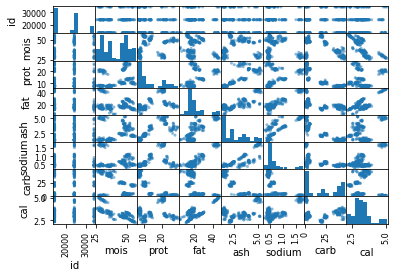

In [8]:
## ลอง plot กราฟเพื่อดู
pd.plotting.scatter_matrix(exam);

In [9]:
exam_matrix = np.array(exam.iloc[:,-7:])
exam_matrix
##เพื่อดู matrix ของ exam 

array([[27.82, 21.43, 44.87, ...,  1.77,  0.77,  4.93],
       [28.49, 21.26, 43.89, ...,  1.79,  1.02,  4.84],
       [28.35, 19.99, 45.78, ...,  1.63,  0.8 ,  4.95],
       ...,
       [44.55, 11.01, 16.03, ...,  0.64, 25.98,  2.92],
       [47.6 , 10.43, 15.18, ...,  0.56, 24.47,  2.76],
       [46.84,  9.91, 15.5 , ...,  0.57, 25.48,  2.81]])

In [10]:
exam_matrix = exam_matrix.T
print(exam_matrix.shape)
exam_matrix

(7, 300)


array([[27.82, 28.49, 28.35, ..., 44.55, 47.6 , 46.84],
       [21.43, 21.26, 19.99, ..., 11.01, 10.43,  9.91],
       [44.87, 43.89, 45.78, ..., 16.03, 15.18, 15.5 ],
       ...,
       [ 1.77,  1.79,  1.63, ...,  0.64,  0.56,  0.57],
       [ 0.77,  1.02,  0.8 , ..., 25.98, 24.47, 25.48],
       [ 4.93,  4.84,  4.95, ...,  2.92,  2.76,  2.81]])

***
##**1.ปรับ mean = 0 และ std = 1**

In [11]:
exam_matrix_m0_std1 = stats.zscore(exam_matrix,axis=1)
exam_matrix_m0_std1

array([[-1.37181459, -1.30156227, -1.31624186, ...,  0.3823963 ,
         0.70220164,  0.62251244],
       [ 1.25418127,  1.22771661,  1.03000998, ..., -0.36794707,
        -0.45823828, -0.53918903],
       [ 2.74984143,  2.64047481,  2.85139615, ..., -0.46866201,
        -0.56352082, -0.52780927],
       ...,
       [ 2.97668662,  3.03077869,  2.59804213, ..., -0.07951534,
        -0.29588362, -0.26883759],
       [-1.22751105, -1.21362189, -1.22584435, ...,  0.1730719 ,
         0.08918137,  0.14529358],
       [ 2.68012924,  2.53473344,  2.71243942, ..., -0.56704362,
        -0.82552504, -0.7447496 ]])

In [12]:
np.mean(exam_matrix_m0_std1,axis=1)

array([-1.18423789e-16,  1.89478063e-16, -2.36847579e-16, -5.21064673e-16,
       -2.36847579e-16, -4.73695157e-17,  1.89478063e-16])

In [13]:
np.std(exam_matrix_m0_std1,axis=1)

array([1., 1., 1., 1., 1., 1., 1.])

(array([ 8., 46., 29., 10., 38., 13.,  5.,  1., 11., 47., 35., 22., 25.,
        10.]),
 array([-1.66750345, -1.42618899, -1.18487452, -0.94356005, -0.70224558,
        -0.46093111, -0.21961664,  0.02169783,  0.2630123 ,  0.50432677,
         0.74564124,  0.98695571,  1.22827018,  1.46958465,  1.71089912]),
 <a list of 14 Patch objects>)

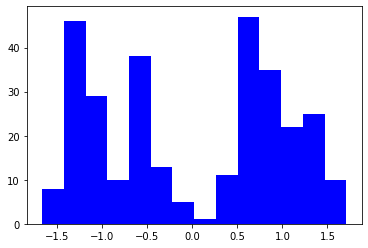

In [14]:
plt.hist(exam_matrix_m0_std1[0,:],bins = 'rice', color = 'b') ##กราฟแท่งเฉพาะที่ตั้งค่า mean = 0 , std = 1 แล้ว

(array([ 8., 46., 29., 10., 38., 13.,  5.,  1., 11., 47., 35., 22., 25.,
        10.]),
 array([-1.66750345, -1.42618899, -1.18487452, -0.94356005, -0.70224558,
        -0.46093111, -0.21961664,  0.02169783,  0.2630123 ,  0.50432677,
         0.74564124,  0.98695571,  1.22827018,  1.46958465,  1.71089912]),
 <a list of 14 Patch objects>)

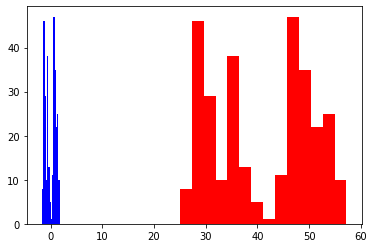

In [15]:
plt.hist(exam_matrix[0,:],bins = 'rice', color = 'r') #กราฟแท่งแบบยังไม่ทำ mean = 0 , std = 1
plt.hist(exam_matrix_m0_std1[0,:],bins = 'rice', color = 'b')  #กราฟแท่งแบบทำ mean = 0 , std = 1
#เทียบกราฟกัน

***
##**2. หา covariance matrix ของข้อมูล**

In [16]:
exam_cov = np.cov(exam_matrix_m0_std1)
exam_cov # หา covarince

array([[ 1.00334448,  0.36145252, -0.17189118,  0.26644367, -0.10262097,
        -0.59378092, -0.7669972 ],
       [ 0.36145252,  1.00334448,  0.49966723,  0.82659903,  0.43056473,
        -0.85639691,  0.07049308],
       [-0.17189118,  0.49966723,  1.00334448,  0.79428157,  0.93644671,
        -0.64237943,  0.76712418],
       [ 0.26644367,  0.82659903,  0.79428157,  1.00334448,  0.8108249 ,
        -0.90199502,  0.32756032],
       [-0.10262097,  0.43056473,  0.93644671,  0.8108249 ,  1.00334448,
        -0.6222505 ,  0.67420485],
       [-0.59378092, -0.85639691, -0.64237943, -0.90199502, -0.6222505 ,
         1.00334448, -0.02356313],
       [-0.7669972 ,  0.07049308,  0.76712418,  0.32756032,  0.67420485,
        -0.02356313,  1.00334448]])

***
##**3.คำนวณ Eigenvectors and Eigenvalues**

In [17]:
eigen_values, eigen_vectors = np.linalg.eig(exam_cov)

In [18]:
eigen_values

array([4.18573434e+00, 2.29811778e+00, 4.15948838e-01, 9.54925358e-02,
       2.77695834e-02, 3.38738483e-04, 9.55061572e-06])

In [19]:
eigen_vectors

array([[ 6.47093729e-02,  6.28275866e-01, -4.21668945e-01,
        -2.20721584e-01,  6.47029345e-03, -4.46449902e-01,
        -4.18569035e-01],
       [ 3.78760904e-01,  2.69706650e-01,  7.46027442e-01,
        -1.05931982e-02,  3.87982788e-01,  1.71520299e-04,
        -2.76764643e-01],
       [ 4.46665915e-01, -2.34379085e-01, -1.99308714e-01,
        -5.07042158e-01, -1.73367634e-01,  5.25402868e-01,
        -3.77671525e-01],
       [ 4.71889526e-01,  1.10990417e-01,  5.62726863e-02,
         5.52398549e-01, -6.70885701e-01, -5.88609281e-02,
        -5.60214003e-02],
       [ 4.35702887e-01, -2.01661652e-01, -4.55168874e-01,
         4.46276890e-01,  6.02614079e-01, -3.13098518e-03,
         5.24323817e-04],
       [-4.24913712e-01, -3.20312078e-01,  5.22365058e-02,
         3.34339481e-01, -7.43689883e-03,  5.08853525e-04,
        -7.76067911e-01],
       [ 2.44487304e-01, -5.67457559e-01,  1.13315588e-01,
        -2.79263154e-01, -7.80031747e-02, -7.21913853e-01,
        -1.2059809

***
## **4 คำนวณว่า แต่ละ eigen vector อธิบายข้อมูลทั้งหมด ได้ดีแค่ไหน**

In [20]:
sum(eigen_values)

7.0234113712374535

In [21]:
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

[59.59688423344787, 32.720819826580865, 5.9223191753902285, 1.3596318186805307, 0.3953859725404401, 0.004822990783854994, 0.00013598257622030136]


In [22]:
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 59.59688423  92.31770406  98.24002324  99.59965505  99.99504103
  99.99986402 100.        ]


In [23]:
selected_eigen_vectors = eigen_vectors[:,:2]
selected_eigen_vectors

array([[ 0.06470937,  0.62827587],
       [ 0.3787609 ,  0.26970665],
       [ 0.44666592, -0.23437908],
       [ 0.47188953,  0.11099042],
       [ 0.43570289, -0.20166165],
       [-0.42491371, -0.32031208],
       [ 0.2444873 , -0.56745756]])

In [24]:
selected_eigen_vectors_more_than_95_per = eigen_vectors[:,:3]
selected_eigen_vectors_more_than_95_per

array([[ 0.06470937,  0.62827587, -0.42166894],
       [ 0.3787609 ,  0.26970665,  0.74602744],
       [ 0.44666592, -0.23437908, -0.19930871],
       [ 0.47188953,  0.11099042,  0.05627269],
       [ 0.43570289, -0.20166165, -0.45516887],
       [-0.42491371, -0.32031208,  0.05223651],
       [ 0.2444873 , -0.56745756,  0.11331559]])

***
## **5.map data ไปบนแกนใหม่**


In [25]:
X = exam_matrix_m0_std1
X.shape

(7, 300)

In [26]:
W_90_per = selected_eigen_vectors
W_90_per.shape

(7, 2)

In [27]:
X_pca = X.T.dot(W_90_per)
X_pca

array([[ 5.01034284, -2.67921532],
       [ 5.02375538, -2.52929455],
       [ 4.8054393 , -2.67370033],
       [ 4.4695434 , -2.28502923],
       [ 4.47189256, -2.1591524 ],
       [ 4.50479978, -2.16797296],
       [ 4.31535781, -2.05704328],
       [ 4.75785167, -2.35308587],
       [ 4.85461934, -2.68121904],
       [ 4.91640631, -2.65851314],
       [ 4.84099582, -2.73660839],
       [ 4.89136871, -2.74250173],
       [ 4.61075407, -2.57925365],
       [ 4.42153254, -2.29169853],
       [ 4.46677678, -2.13288492],
       [ 4.75343467, -2.46713643],
       [ 4.44513083, -1.82836512],
       [ 4.20201792, -1.80148331],
       [ 4.49687192, -1.88605015],
       [ 4.60756167, -2.2350726 ],
       [ 4.85726834, -2.96634356],
       [ 4.82265249, -2.78671232],
       [ 4.51834142, -2.16243103],
       [ 4.25395639, -2.12444278],
       [ 4.48975064, -2.0179968 ],
       [ 4.5415983 , -2.38008587],
       [ 4.63411775, -2.60980367],
       [ 4.46880183, -2.43393573],
       [ 4.75034835,

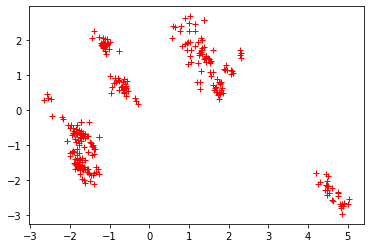

In [31]:
plt.plot(X_pca[:,0],X_pca[:,1],'+r')

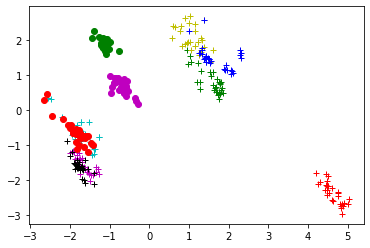

In [30]:
plt.plot(X_pca[:29,0],X_pca[:29,1],'+r')
plt.plot(X_pca[29:60,0],X_pca[29:60,1],'+g')
plt.plot(X_pca[60:87,0],X_pca[60:87,1],'+y')
plt.plot(X_pca[87:119,0],X_pca[87:119,1],'+b')
plt.plot(X_pca[119:147,0],X_pca[119:147,1],'+c')
plt.plot(X_pca[147:177,0],X_pca[147:177,1],'+m')
plt.plot(X_pca[177:206,0],X_pca[177:206,1],'+k')
plt.plot(X_pca[206:239,0],X_pca[206:239,1],'or')
plt.plot(X_pca[239:268,0],X_pca[239:268,1],'og')
plt.plot(X_pca[268:300,0],X_pca[268:300,1],'om')

In [32]:
pca = PCA(n_components=2)

In [33]:
n_pca = pca.fit_transform(X.T)
n_pca

array([[ 5.01034284,  2.67921532],
       [ 5.02375538,  2.52929455],
       [ 4.8054393 ,  2.67370033],
       [ 4.4695434 ,  2.28502923],
       [ 4.47189256,  2.1591524 ],
       [ 4.50479978,  2.16797296],
       [ 4.31535781,  2.05704328],
       [ 4.75785167,  2.35308587],
       [ 4.85461934,  2.68121904],
       [ 4.91640631,  2.65851314],
       [ 4.84099582,  2.73660839],
       [ 4.89136871,  2.74250173],
       [ 4.61075407,  2.57925365],
       [ 4.42153254,  2.29169853],
       [ 4.46677678,  2.13288492],
       [ 4.75343467,  2.46713643],
       [ 4.44513083,  1.82836512],
       [ 4.20201792,  1.80148331],
       [ 4.49687192,  1.88605015],
       [ 4.60756167,  2.2350726 ],
       [ 4.85726834,  2.96634356],
       [ 4.82265249,  2.78671232],
       [ 4.51834142,  2.16243103],
       [ 4.25395639,  2.12444278],
       [ 4.48975064,  2.0179968 ],
       [ 4.5415983 ,  2.38008587],
       [ 4.63411775,  2.60980367],
       [ 4.46880183,  2.43393573],
       [ 4.75034835,

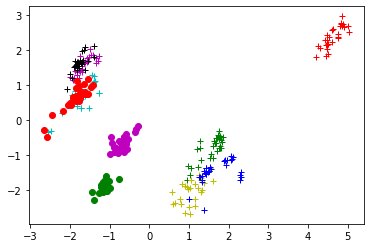

In [34]:
plt.plot(n_pca[:29,0],n_pca[:29,1],'+r')
plt.plot(n_pca[29:60,0],n_pca[29:60,1],'+g')
plt.plot(n_pca[60:87,0],n_pca[60:87,1],'+y')
plt.plot(n_pca[87:119,0],n_pca[87:119,1],'+b')
plt.plot(n_pca[119:147,0],n_pca[119:147,1],'+c')
plt.plot(n_pca[147:177,0],n_pca[147:177,1],'+m')
plt.plot(n_pca[177:206,0],n_pca[177:206,1],'+k')
plt.plot(n_pca[206:239,0],n_pca[206:239,1],'or')
plt.plot(n_pca[239:268,0],n_pca[239:268,1],'og')
plt.plot(n_pca[268:300,0],n_pca[268:300,1],'om')

In [39]:
exam


,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [40]:
exam.shape

(300, 9)

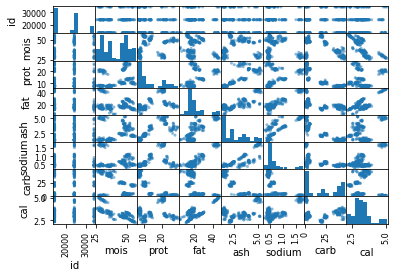

In [42]:
pd.plotting.scatter_matrix(exam);

In [44]:
newexam =  exam.iloc[:,2:]
newexam

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [45]:
corr = np.corrcoef(newexam.to_numpy().T)
corr.shape

(7, 7)

In [46]:
corr

array([[ 1.        ,  0.36024768, -0.17131821,  0.26555552, -0.1022789 ,
        -0.59180165, -0.76444054],
       [ 0.36024768,  1.        ,  0.49800167,  0.8238437 ,  0.42912952,
        -0.85354226,  0.0702581 ],
       [-0.17131821,  0.49800167,  1.        ,  0.79163396,  0.93332522,
        -0.64023817,  0.7645671 ],
       [ 0.26555552,  0.8238437 ,  0.79163396,  1.        ,  0.80812215,
        -0.89898837,  0.32646845],
       [-0.1022789 ,  0.42912952,  0.93332522,  0.80812215,  1.        ,
        -0.62017634,  0.6719575 ],
       [-0.59180165, -0.85354226, -0.64023817, -0.89898837, -0.62017634,
         1.        , -0.02348458],
       [-0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,  0.6719575 ,
        -0.02348458,  1.        ]])

In [48]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'column = {i} <=> column = {j} corrcoef = {corr[i,j]}')

In [50]:
exam_graph = exam.drop(['id'],axis=1)
exam_graph

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [53]:
exam_drop = exam.drop(['id','brand'],axis=1)
exam_drop

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


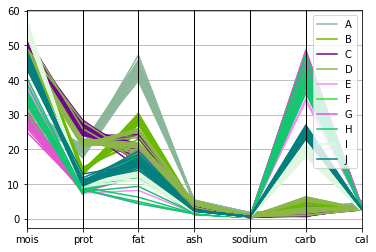

In [54]:
pd.plotting.parallel_coordinates(exam_graph, 'brand')

In [55]:
pca = PCA(n_components=2)

In [57]:
new_exam_pca = pca.fit_transform(exam_drop.to_numpy())
new_exam_pca

array([[-2.49517479e+01,  2.68116678e+01],
       [-2.46119758e+01,  2.56595634e+01],
       [-2.49384190e+01,  2.69305710e+01],
       [-2.43255609e+01,  2.35235671e+01],
       [-2.38660483e+01,  2.26528128e+01],
       [-2.42716473e+01,  2.25496261e+01],
       [-2.38806695e+01,  2.18852969e+01],
       [-2.23894923e+01,  2.39358506e+01],
       [-2.45074215e+01,  2.66033180e+01],
       [-2.50928469e+01,  2.71508163e+01],
       [-2.48185674e+01,  2.76159021e+01],
       [-2.39395254e+01,  2.75274080e+01],
       [-2.44496724e+01,  2.62221990e+01],
       [-2.28480039e+01,  2.27702098e+01],
       [-2.42812192e+01,  2.25656557e+01],
       [-2.38786302e+01,  2.39995991e+01],
       [-2.32390338e+01,  1.96576785e+01],
       [-2.36081213e+01,  1.88694931e+01],
       [-2.34833228e+01,  2.08403006e+01],
       [-2.30861647e+01,  2.25687679e+01],
       [-2.44317537e+01,  2.88343106e+01],
       [-2.39812139e+01,  2.72251577e+01],
       [-2.43513670e+01,  2.27327854e+01],
       [-2.

In [60]:
new_exam_pca.shape

(300, 2)

In [69]:
bd = set(exam['brand'])
bd

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

In [72]:
bd_list = list(Brand)
bd_list.sort() 
color_list = {}
num = 0
for each_bd in bd:
   if each_bd not in color_list:
       color_list[each_bd] = num
       num += 1

In [73]:
color_list

{'A': 8,
 'B': 3,
 'C': 7,
 'D': 9,
 'E': 0,
 'F': 2,
 'G': 6,
 'H': 5,
 'I': 4,
 'J': 1}

In [75]:
second_exam = exam_graph.replace(color_list)
second_exam

,brand,mois,prot,fat,ash,sodium,carb,cal
0,8,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,8,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,8,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,8,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,8,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,1,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,1,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,1,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,1,47.60,10.43,15.18,2.32,0.56,24.47,2.76


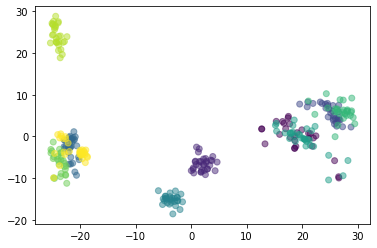

In [78]:
plt.scatter(new_exam_pca[:,0],new_exam_pca[:,1],c = second_exam['brand'],alpha=0.5)

In [83]:
exam_test = second_exam[(second_exam['brand']==9) | (second_exam['brand']==5)] 
exam_test

,brand,mois,prot,fat,ash,sodium,carb,cal
87,9,46.64,21.38,24.96,4.60,0.77,2.42,3.20
88,9,45.93,21.60,25.87,4.51,0.73,2.09,3.28
89,9,47.60,22.07,21.13,4.07,0.72,5.13,2.99
90,9,47.61,22.44,19.61,4.06,0.60,6.28,2.91
91,9,46.91,21.79,21.17,4.06,0.76,6.07,3.02
...,...,...,...,...,...,...,...,...
234,5,36.32,8.06,12.54,1.35,0.43,41.73,3.12
235,5,34.61,7.17,17.88,1.29,0.40,39.05,3.46
236,5,36.67,7.81,9.34,1.64,0.44,44.54,2.93
237,5,35.94,7.97,13.50,1.45,0.42,41.14,3.18


In [112]:
pca = PCA(n_components=2) 
new_pca_2 = pca.fit_transform(exam_test.iloc[:,1:].to_numpy())

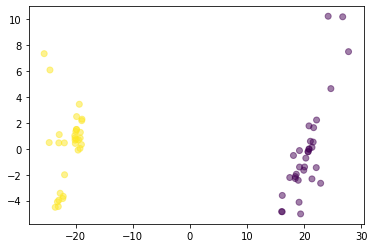

In [113]:
plt.scatter(new_pca_2[:,0],new_pca_2[:,1],c = exam_test['brand'],alpha=0.5)

In [114]:
D_pca = pca.transform(exam_test[exam_test['brand']==9].iloc[:,1:].to_numpy())
H_pca = pca.transform(exam_test[exam_test['brand']==5].iloc[:,1:].to_numpy())

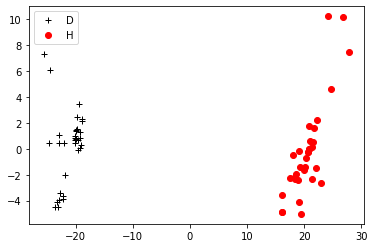

In [115]:
plt.plot(D_pca[:,0],D_pca[:,1],'+k',label='D')
plt.plot(H_pca[:,0],H_pca[:,1],'or',label='H')
plt.legend()


In [116]:
pca.explained_variance_ratio_

array([0.97484635, 0.0236345 ])

Text(0, 0.5, 'PC2 2.36%')

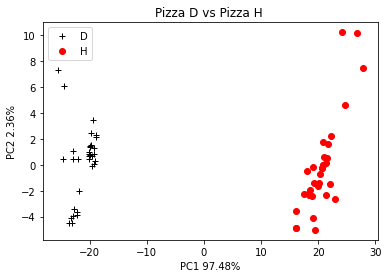

In [126]:
plt.plot(D_pca[:,0],D_pca[:,1],'+k',label='D')
plt.plot(H_pca[:,0],H_pca[:,1],'or',label='H')
plt.legend()
plt.title('Pizza D vs Pizza H '); 
plt.xlabel('PC1 97.48%'); 
plt.ylabel('PC2 2.36%')